In [21]:
import pandas as pd

data = pd.read_csv('Resources\demographic_ml_df.csv')


In [22]:
data=data.dropna()
data

,Unnamed: 0,year,country_origin,country_asylum,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,...,unknown_demographic,male_60,male_other,total,helper,recognized_decisions,complementary_protection,rejected,otherwise_closed,total_decisions
0,0,2001,Afghanistan,Australia,no,0,0,0,0,0,...,6262,0,0,6262,2001Afghanistan,1914.0,0.0,522.0,10.0,2446.0
1,1,2001,Afghanistan,Austria,no,0,0,0,0,0,...,1049,0,0,1049,2001Afghanistan,432.0,0.0,335.0,0.0,767.0
2,2,2001,Afghanistan,Azerbaijan,no,8,12,10,38,0,...,0,0,0,243,2001Afghanistan,226.0,0.0,45.0,0.0,271.0
3,3,2001,Afghanistan,Belarus,no,9,40,36,81,6,...,0,5,0,454,2001Afghanistan,85.0,0.0,25.0,51.0,161.0
4,4,2001,Afghanistan,Belgium,no,0,0,0,0,0,...,0,0,213,357,2001Afghanistan,100.0,0.0,42.0,0.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61193,61193,2021,Zimbabwe,South Africa,yes,0,43,146,1481,73,...,0,70,0,3965,2021Zimbabwe,13.0,0.0,737.0,207.0,957.0
61194,61194,2021,Zimbabwe,Sweden,no,0,0,0,0,0,...,16,0,0,16,2021Zimbabwe,0.0,0.0,16.0,0.0,16.0
61195,61195,2021,Zimbabwe,Switzerland,no,0,9,0,0,0,...,0,0,0,9,2021Zimbabwe,0.0,0.0,5.0,0.0,5.0
61197,61197,2021,Zimbabwe,United Kingdom of Great Britain and Northern I...,no,0,0,0,0,0,...,1174,0,0,1174,2021Zimbabwe,44.0,5.0,53.0,10.0,112.0


In [23]:
data = data.drop('helper', axis=1)

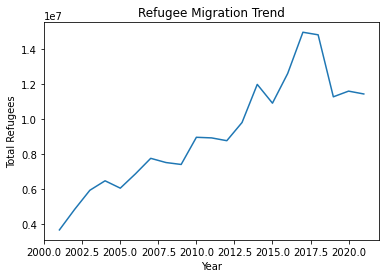

In [24]:
import matplotlib.pyplot as plt

yearly_data = data.groupby('year')['total'].sum()
plt.plot(yearly_data.index, yearly_data.values)
plt.xlabel('Year')
plt.ylabel('Total Refugees')
plt.title('Refugee Migration Trend')
plt.show()


In [25]:
top_sources = data.groupby('country_origin')['total'].sum().nlargest(10)
print(top_sources)


country_origin
Afghanistan               44586893
Syrian Arab Rep.          27772191
Somalia                   11865859
Sudan                     10381037
Dem. Rep. of the Congo     9604300
South Sudan                9360888
Iraq                       9272078
Myanmar                    6436323
Eritrea                    6287803
Central African Rep.       5612869
Name: total, dtype: int64


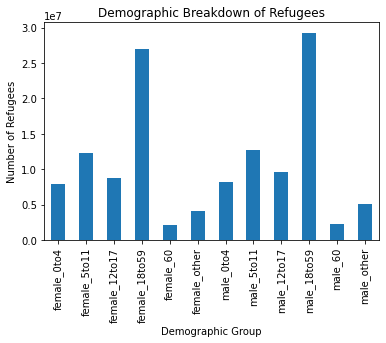

In [26]:
demographic_cols = ['female_0to4', 'female_5to11', 'female_12to17', 'female_18to59', 'female_60', 'female_other', 
                    'male_0to4', 'male_5to11', 'male_12to17', 'male_18to59', 'male_60', 'male_other']
demographic_data = data[demographic_cols].sum()
demographic_data.plot(kind='bar')
plt.xlabel('Demographic Group')
plt.ylabel('Number of Refugees')
plt.title('Demographic Breakdown of Refugees')
plt.show()

Can we predict the recognition rate of asylum applications based on demographic variables such as gender and age range?

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


y = data["recognized_decisions"]
X = data[['female_0to4','female_5to11','female_12to17','female_18to59','female_60', 'female_other',
         'male_0to4','male_5to11','male_12to17','male_18to59','male_60', 'male_other']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model to training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions on testing data
y_pred = logreg.predict(X_test_scaled)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.40894078792167965
